Import Libraries

In [176]:
import numpy as np
import math
import os 
import csv 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
masses={1:1.007825,2:4.003,3:6.941,4:9.012,5:10.81,6:12.00,7:14.01,8:15.9949,9:19.00}

Functions to calculate all of the necessary geometric parameters

In [177]:
def distance(i,j):
    """Calculate the distance between two centers"""
    return math.sqrt(np.sum((np_geom[i]-np_geom[j])**2))
def angle(i,j,k):
    """Calcuate the angle in degrees between three atom centers!!!""" 
    eji=(np_geom[i]-np_geom[j])/ distance(i,j)
    ejk=(np_geom[k]-np_geom[j])/distance(j,k)
    return np.arccos(np.dot(eji,ejk))
def out_of_plane(i,j,k,l):
    """"Calculate the out of plane angle for three atom centers
        Input is the index for the four atom positions found in np_geom."""
    ekl=(np_geom[l]-np_geom[k])/distance(l,k)
    ekj=(np_geom[j]-np_geom[k])/distance(k,j)
    eki=(np_geom[i]-np_geom[k])/distance(i,k)
    temp_ang = angle(j,k,l)
    if temp_ang > 1.0:
        temp_ang= 1.000
    elif temp_ang < -1.0:
        temp_ang = -1.000
    return(np.arcsin(np.dot(np.cross(ekj,ekl)/np.sin(temp_ang),eki)))

def dihedral(i,j,k,l):
    """Calculate the dihedral angle for four atom centers
    Input is the index for the four atoms."""
    eij=(np_geom[j]-np_geom[i])/distance(i,j)
    ejk=(np_geom[k]-np_geom[j])/distance(j,k)
    ekl=(np_geom[l]-np_geom[k])/distance(l,k)
    temp_ang1=np.sin(angle(i,j,k))
    temp_ang2=np.sin(angle(j,k,l))
    if abs(temp_ang1) >= 1.0 or abs(temp_ang2) >= 1.0:
        return 0.000
    else:
        if(abs(np.dot(np.cross(eij,ejk),np.cross(ejk,ekl))/(temp_ang1*temp_ang2))>1.0):
            return math.pi
        else:
            return(np.arccos(np.dot(np.cross(eij,ejk),np.cross(ejk,ekl))/(temp_ang1*temp_ang2)))

def COM(anums,geoms):
    """Calculate the center of mass for a given molecule with the atomic numbers and positions"""
    com=np.zeros(3)
    atmass=0.
    for i in range(natoms):
        com = com + masses[anums[i]]*geoms[i]
        atmass = atmass + masses[anums[i]]
    return (com/atmass)

Section to read in the coordinates from a file.  The geometric coordinates are then stored in numpy arrays called np_atnums and np_geom.  

In [178]:
# file1=open('benzene.dat','r')/
file1=open('acetaldehyde.dat','r')
line=file1.readline()
natoms = int(line)
atnums=[]
geom=[]

for line in file1:
    columns = line.split()
    atnums.append(columns[1])
    geom.append(columns[3:])
file1.close()

np_geom=np.array(geom).astype(float)
np_atnums=np.array(atnums).astype(int)
print(COM(np_atnums,np_geom))
np_geom=np_geom-COM(np_atnums,np_geom)

[0.645 0.    2.317]


Calculate the Bond Distances

In [179]:
dist=np.zeros((natoms,natoms))

for i in range(natoms):
    for j in range (natoms):
        dist[i,j] = distance(i,j)
dist = dist *0.529
# print(dist)

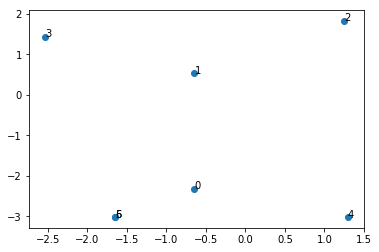

In [180]:
plt.scatter(np_geom[:,0],np_geom[:,2])
for i, txt in enumerate(np_atnums):
    plt.annotate(i, (np_geom[i,0],np_geom[i,2]))
plt.show()

Calculate all of the bond angles


In [181]:
ang= np.zeros((natoms,natoms,natoms))
for i in range(natoms):
    for j in range(natoms):
        for k in range(natoms):
            if(i < j and j != k and i!=k and dist[i,j] < 2 and dist[j,k] < 2):
                ang[i,j,k]= angle(i,j,k)
                print(i,j,k,ang[i,j,k]*180/math.pi)

0 1 2 124.26830826072015
0 1 3 115.4793409840136
0 4 5 35.10952898770736
0 4 6 35.10952898770736
0 5 4 34.93678870270001
0 5 6 36.373677061387795
0 6 4 34.93678870270001
0 6 5 36.373677061387795
4 5 0 34.93678870270001
4 5 6 60.48447613677994
4 6 0 34.93678870270001
4 6 5 60.48447613677994
5 6 0 36.373677061387795
5 6 4 60.48447613677994


Calculate the dihedral and out-of-plane angles

In [182]:
oop= np.zeros((natoms,natoms,natoms,natoms))
dih= np.zeros((natoms,natoms,natoms,natoms))

for i in range(natoms):
    for j in range(natoms):
        for k in range(natoms):
            for l in range(natoms):
                if (i != j and i != k and i != l and j != k and j != l and k != l):
                    if (dist[i,j] < 1.7 and dist[j,k] < 1.7 and dist[k,l] < 1.7):
                        dih[i,j,k,l] = dihedral(i,j,k,l)
                        oop[i,j,k,l] = out_of_plane(i,j,k,l)
                        print("Atoms: {0:2d},{1:2d},{2:2d},{3:2d}, Dihedral: {4:7.3f}".format(i,j,k,l,180.0/math.pi*dih[i,j,k,l]))
#                         print("Atoms: {0:2d},{1:2d},{2:2d},{3:2d}, Out of Plane: {4:7.3f}".format(i,j,k,l,180.0/math.pi*oop[i,j,k,l]))

Atoms:  2, 1, 0, 4, Dihedral:   0.000
Atoms:  2, 1, 0, 5, Dihedral: 121.098
Atoms:  2, 1, 0, 6, Dihedral: 121.098
Atoms:  3, 1, 0, 4, Dihedral: 180.000
Atoms:  3, 1, 0, 5, Dihedral:  58.902
Atoms:  3, 1, 0, 6, Dihedral:  58.902
Atoms:  4, 0, 1, 2, Dihedral:   0.000
Atoms:  4, 0, 1, 3, Dihedral: 180.000
Atoms:  5, 0, 1, 2, Dihedral: 121.098
Atoms:  5, 0, 1, 3, Dihedral:  58.902
Atoms:  6, 0, 1, 2, Dihedral: 121.098
Atoms:  6, 0, 1, 3, Dihedral:  58.902


Calculate the Moments of Inertia

In [203]:
print(np_geom)
print(COM(np_atnums,np_geom))
II = np.zeros((3,3))
for i in range(natoms):
    II[0,0] = II[0,0] + masses[np_atnums[i]]*(np_geom[i,1]**2+np_geom[i,2]**2)
    II[1,1] = II[1,1] + masses[np_atnums[i]]*(np_geom[i,0]**2+np_geom[i,2]**2)
    II[2,2] = II[2,2] + masses[np_atnums[i]]*(np_geom[i,0]**2+np_geom[i,1]**2)
    for j in range(3):
        for k in range(3):
            if(j != k):
                II[j,k] = II[j,k] + masses[np_atnums[i]]*np_geom[i,j]*np_geom[i,k]
print(II)
            

[[-0.645  0.    -2.317]
 [-0.645  0.     0.528]
 [ 1.254  0.     1.822]
 [-2.539  0.     1.431]
 [ 1.298  0.    -3.018]
 [-1.652 -1.67  -3.023]
 [-1.652  1.67  -3.023]]
[-0.  0. -0.]
[[156.154   0.     52.856]
 [  0.    199.371   0.   ]
 [ 52.856   0.     54.46 ]]


In [204]:
w,v=np.linalg.eigh(II)

In [207]:
print(v)

[[-0.392  0.92   0.   ]
 [ 0.     0.    -1.   ]
 [ 0.92   0.392  0.   ]]
